In [18]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [19]:
digits = pd.read_csv('../data/digits.csv')

In [20]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [21]:
pixels = digits.drop('number_label', axis=1)

In [22]:
single_image = pixels.iloc[0]
single_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [23]:
single_image.to_numpy()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [24]:
number = single_image.to_numpy().reshape(8, 8)

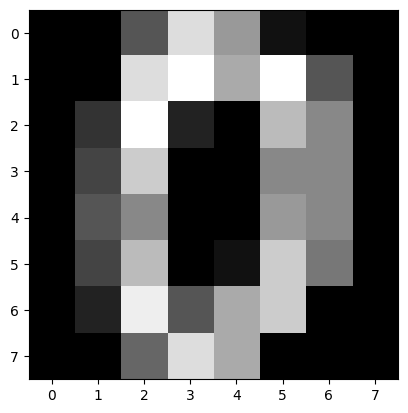

In [25]:
plt.imshow(number, cmap='grey')

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(pixels)

In [27]:
from sklearn.decomposition import PCA 
pca_model = PCA(n_components=2)

In [28]:
pca_pixels = pca_model.fit_transform(scaled_X)

In [29]:
np.sum(pca_model.explained_variance_ratio_)

0.21594970484680012

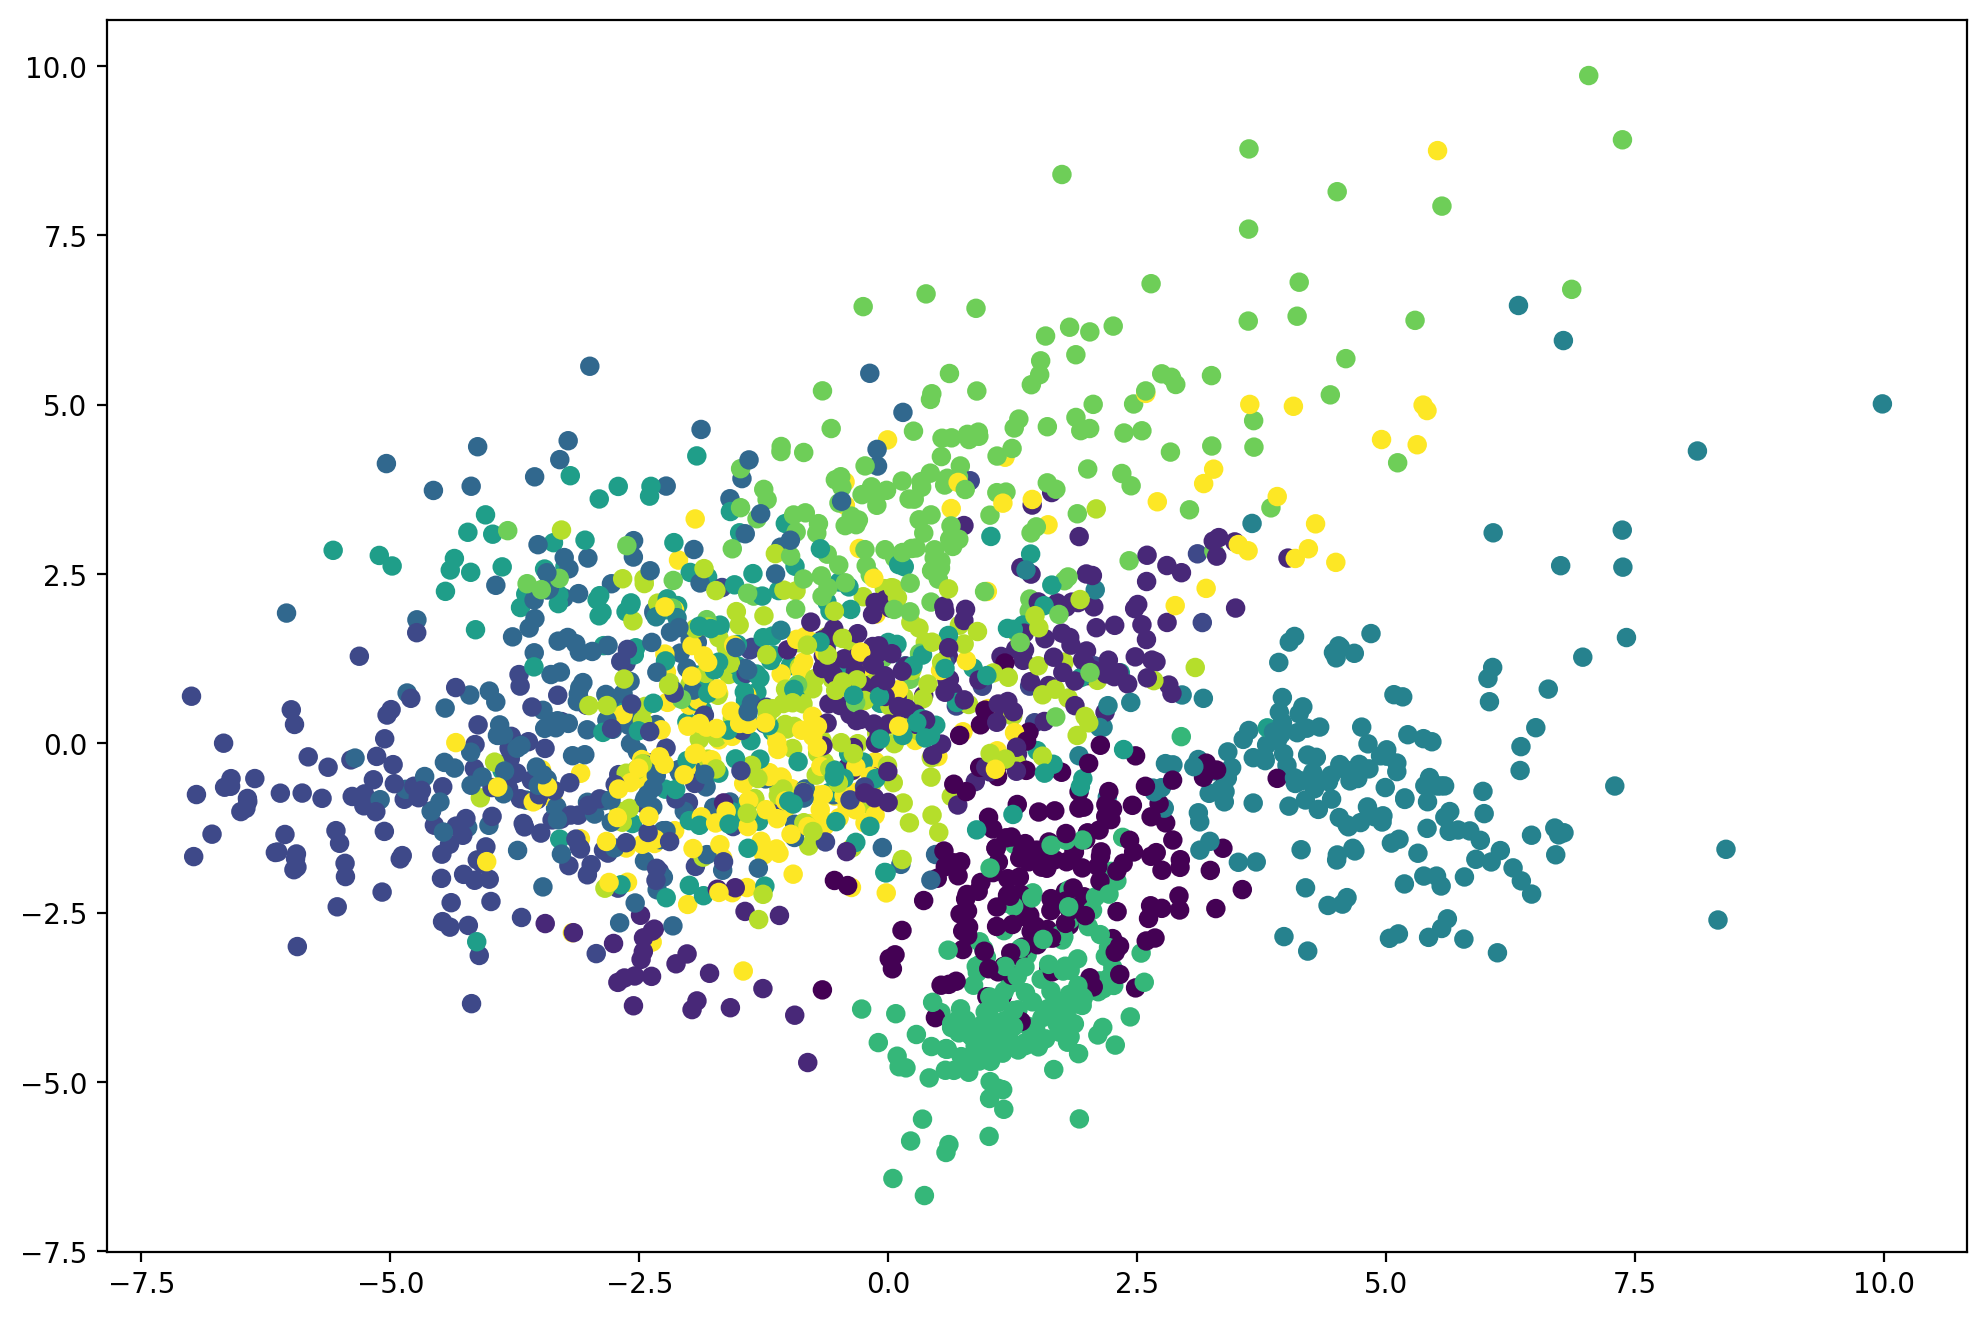

In [30]:
plt.figure(figsize=(12,8), dpi=200)
plt.scatter(pca_pixels[:,0], pca_pixels[:,1], c=digits['number_label'])

In [31]:
pca_model = PCA(n_components=3)

In [32]:
pca_pixels = pca_model.fit_transform(scaled_X)

In [33]:
from mpl_toolkits import mplot3d

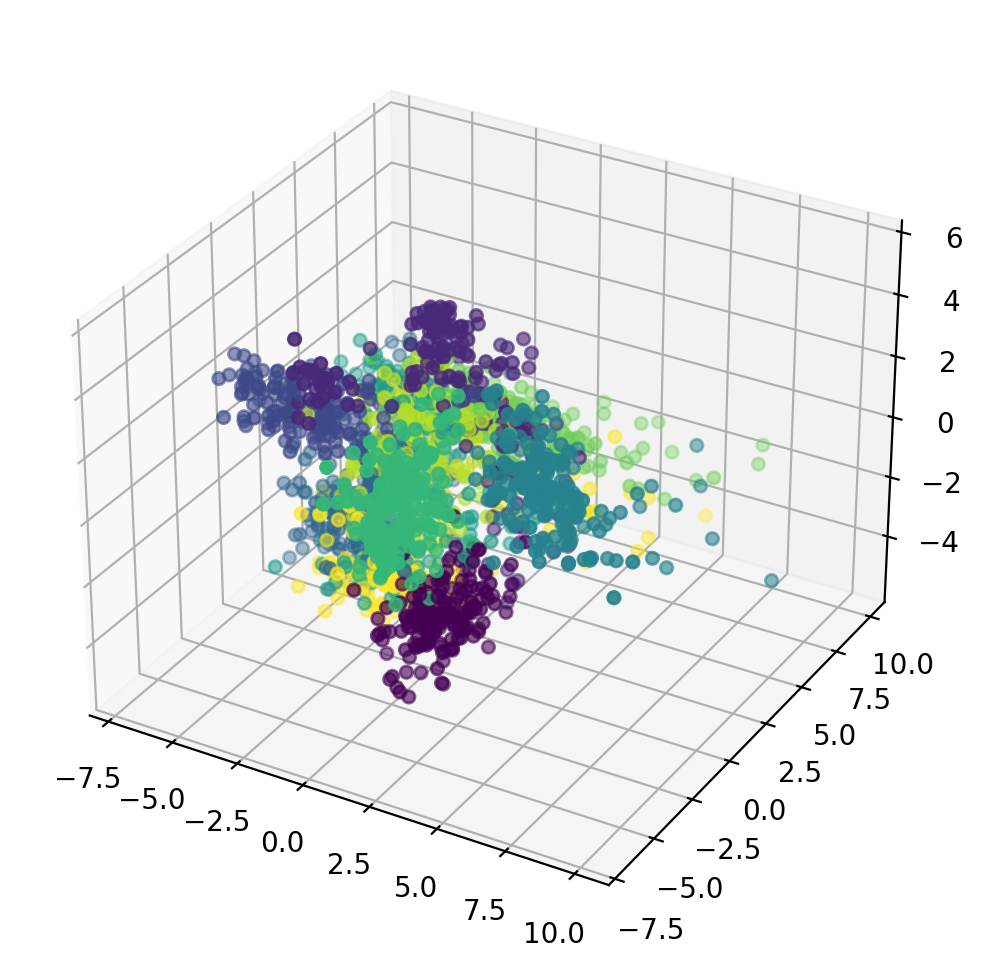

In [34]:
plt.figure(figsize=(12, 6), dpi=200)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0], pca_pixels[:,1], pca_pixels[:,2], c=digits['number_label']);